In [398]:
library(dplyr)
library(tibble)
library(stringr)
library(readr)
library(tidyr)
library(lfe)
library(scales)
library(repr)
library(stargazer)
library(patchwork)
library(gganimate)
options(repr.plot.width=7, repr.plot.height=7)
source('../utils/adjacency_and_cluster_robust_inference.R')
source('../utils/geo_utils.r')
source("../utils/labels_and_colors.r")

In [399]:
source('~/covid_mobility/paper_code/utils/residualizer+genAlters.R')
load('/nfs/sloanlab004/projects/covid_mobility_proj/data/PROCESSED_DATA/social_adj_matrix.RData')
panel = readRDS('/nfs/sloanlab004/projects/covid_mobility_proj/data/PROCESSED_DATA/data_v2.RData')
load('/nfs/sloanlab004/projects/covid_mobility_proj/data/PROCESSED_DATA/conley_selector_matrix.Rdata')

In [400]:
load('/nfs/sloanlab004/projects/covid_mobility_proj/data/PROCESSED_DATA/ivNames.RData')
load('/nfs/sloanlab004/projects/covid_mobility_proj/data/PROCESSED_DATA/ivLassoModel.Rdata') #cvLasso

In [402]:
fs.lasso.coefs <- cvlasso$glmnet.fit$beta[["alter_rnstu.r"]]
dim(fs.lasso.coefs)
head(fs.lasso.coefs)

[1] 1610  100

   [[ suppressing 100 column names ‘s0’, ‘s1’, ‘s2’ ... ]]



6 x 100 sparse Matrix of class "dgCMatrix"
                                                                     
alter_prcp10.r .  .             .            .            .          
alter_prcp11.r . -0.0008998045 -0.001719673 -0.002466706 -0.003147375
alter_prcp12.r .  .             .            .            .          
alter_prcp13.r .  .             .            .            .          
alter_prcp14.r .  .             .            .            .          
alter_prcp15.r .  .             .            .            .          
                                                                  
alter_prcp10.r  .            .            .           .           
alter_prcp11.r -0.003767576 -0.004332679 -0.00484758 -0.0051066856
alter_prcp12.r  .            .            .           .           
alter_prcp13.r  .            .            .           .           
alter_prcp14.r  .            .            .          -0.0003404107
alter_prcp15.r  .            .            .           .          

In [403]:
fs.lasso.coefs.entry <- apply(fs.lasso.coefs, 1, function(x) {
        cvlasso$glmnet.fit$lambda[min(which(x != 0))]
})

Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x !

Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x !

Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x !

Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x !

Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x !

Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x !

Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x !

Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x !

Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x !

Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x !

Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x !

Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x !

Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x !

In [404]:
fs.lasso.coefs.entry.top <- as.data.frame(sort(fs.lasso.coefs.entry, TRUE))
names(fs.lasso.coefs.entry.top) <- "entry.lambda"
fs.lasso.coefs.entry.top <- fs.lasso.coefs.entry.top %>%
    rownames_to_column("var") %>%
    mutate(
        r = rank(-entry.lambda)
    )

In [406]:
fs.lasso.coefs.entry.top <- fs.lasso.coefs.entry.top %>%
    inner_join(ivNames)

Joining, by = "var"

Warning message:
“Column `var` joining character vector and factor, coercing into character vector”


In [407]:
names(panel)[grepl("alter", names(panel))]

[1] "alter_nhd"             "alter_sh"              "alter_btvrc"          
 [4] "alter_rnstu"           "alter_mcbgv"           "alter_bgmr"           
 [7] "alter_shiftshare_11"   "alter_shiftshare_21"   "alter_shiftshare_22"  
[10] "alter_shiftshare_23"   "alter_shiftshare_31"   "alter_shiftshare_32"  
[13] "alter_shiftshare_33"   "alter_shiftshare_42"   "alter_shiftshare_44"  
[16] "alter_shiftshare_45"   "alter_shiftshare_48"   "alter_shiftshare_49"  
[19] "alter_shiftshare_51"   "alter_shiftshare_52"   "alter_shiftshare_53"  
[22] "alter_shiftshare_54"   "alter_shiftshare_55"   "alter_shiftshare_56"  
[25] "alter_shiftshare_61"   "alter_shiftshare_62"   "alter_shiftshare_71"  
[28] "alter_shiftshare_72"   "alter_shiftshare_81"   "alter_shiftshare_92"  
[31] "alter_shiftshare_NA"   "geo_alter_sh"          "geo_alter_bgmr"       
[34] "ash_alter_nhd"         "ash_alter_rnstu"       "log_alter_mcbgv"      
[37] "alter_nhd.r"           "alter_sh.r"            "alter_btvrc.r"        
[40] "alter_rnstu.r"         "alter_mcbgv.r"         "alter_bgmr.r"         
[43] "alter_shiftshare_11.r" "alter_shiftshare_21.r" "alter_shiftshare_22.r"
[46] "alter_shiftshare_23.r" "alter_shiftshare_31.r" "alter_shiftshare_32.r"
[49] "alter_shiftshare_33.r" "alter_shiftshare_42.r" "alter_shiftshare_44.r"
[52] "alter_shiftshare_45.r" "alter_shiftshare_48.r" "alter_shiftshare_49.r"
[55] "alter_shiftshare_51.r" "alter_shiftshare_52.r" "alter_shiftshare_53.r"
[58] "alter_shiftshare_54.r" "alter_shiftshare_55.r" "alter_shiftshare_56.r"
[61] "alter_shiftshare_61.r" "alter_shiftshare_62.r" "alter_shiftshare_71.r"
[64] "alter_shiftshare_72.r" "alter_shiftshare_81.r" "alter_shiftshare_92.r"
[67] "alter_shiftshare_NA.r" "geo_alter_sh.r"        "geo_alter_bgmr.r"     
[70] "ash_alter_nhd.r"       "ash_alter_rnstu.r"     "log_alter_mcbgv.r"

In [412]:
head(fs.lasso.coefs.entry.top)

,var,entry.lambda,r,iv
,<chr>,<dbl>,<dbl>,<fct>
1,alter_prcp11.r,0.0016222036,1.0,iv002
2,alter_prcp14.r,0.0008458183,2.0,iv005
3,alter_tmax08.r,0.0007022132,3.0,iv018
4,alter_prcp15.r,0.0005829898,4.0,iv006
5,alter_tmax13:alter_sh.r,0.0004018322,5.0,iv227
6,alter_tmax15.r,0.0003661346,6.5,iv025


In [413]:
fs.lasso.coefs.entry.top %>% filter(grepl("shift", var)) %>% head(20)

,var,entry.lambda,r,iv
,<chr>,<dbl>,<dbl>,<fct>
1,alter_tmax02:alter_shiftshare_72:alter_sh.r,6.860693e-05,28.0,iv298
2,alter_tmax04:alter_shiftshare_72.r,5.695868e-05,32.5,iv117
3,alter_tmax14:alter_shiftshare_72.r,5.189863e-05,34.5,iv173
4,alter_tmax04:alter_shiftshare_72:alter_sh.r,4.728810e-05,37.5,iv308
5,alter_shiftshare_71:alter_sh.r,4.308715e-05,40.5,iv241
6,alter_shiftshare_72.r,3.925941e-05,43.0,iv040
7,alter_shiftshare_61.r,3.577171e-05,47.0,iv037
8,alter_shiftshare_45:alter_sh.r,3.577171e-05,47.0,iv237
9,alter_tmax08:alter_shiftshare_72.r,2.969830e-05,52.0,iv141


In [395]:
weatherQuantileValues <- readRDS("/nfs/sloanlab004/projects/covid_mobility_proj/data/PROCESSED_DATA/weatherQuantileValues.RDS")

In [416]:
weatherQuantileValues %>% filter(max > 0) %>% head()

var,quantile,min,max
<chr>,<int>,<dbl>,<dbl>
PRCP,10,0.0000,0.0600000
PRCP,11,0.0600,0.1869565
PRCP,12,0.1875,0.4000000
PRCP,13,0.4000,0.8000000
PRCP,14,0.8000,1.4000000
PRCP,15,1.4000,2.4409091


In [417]:
### IF YOU NEED TO ADD A VARIABLE/INTERACTION
panel %>%
    mutate(ash_rnstu_Xsh = ash_rnstu * stay_home,
           ash_alter_rnstu = asinh(alter_rnstu),
           ash_alter_nhd   = asinh(alter_nhd),
           log_alter_mcbgv = asinh(alter_mcbgv),
           fb_alter_btvrc = asinh(alter_btvrc)) %>%
    mutate(alter_rnstu_Xsh = weightedAlters(., WM, ash_rnstu_Xsh),   
           alter_rnstu_Xsh.r = panel_residualizer(alter_rnstu_Xsh),
           ash_alter_rnstu.r = panel_residualizer(ash_alter_rnstu),
           ash_alter_nhd.r = panel_residualizer(ash_alter_nhd),
           log_alter_mcbgv.r = panel_residualizer(log_alter_mcbgv),
           fb_alter_btvrc.r = panel_residualizer(fb_alter_btvrc)) -> panel
### NOTE if VAR is generated in a mutate, then weightedAlters(., WM, VAR) cannot be in the same mutate.

[1]	train-rmse:0.258359+0.000216	test-rmse:0.258639+0.001524 
Multiple eval metrics are present. Will use test_rmse for early stopping.
Will train until test_rmse hasn't improved in 3 rounds.

[2]	train-rmse:0.139379+0.000261	test-rmse:0.140046+0.001698 
[3]	train-rmse:0.086538+0.000460	test-rmse:0.087683+0.001555 
[4]	train-rmse:0.066738+0.000553	test-rmse:0.068029+0.001308 
[5]	train-rmse:0.060482+0.000636	test-rmse:0.062171+0.001396 
[6]	train-rmse:0.058673+0.000690	test-rmse:0.060435+0.001391 
[7]	train-rmse:0.058015+0.000721	test-rmse:0.060118+0.001352 
[8]	train-rmse:0.057679+0.000709	test-rmse:0.060005+0.001439 
[9]	train-rmse:0.057388+0.000764	test-rmse:0.059879+0.001423 
[10]	train-rmse:0.057157+0.000845	test-rmse:0.059887+0.001275 
[11]	train-rmse:0.057057+0.000822	test-rmse:0.059820+0.001351 
[12]	train-rmse:0.056972+0.000819	test-rmse:0.059790+0.001307 
[13]	train-rmse:0.056769+0.000810	test-rmse:0.059794+0.001323 
[14]	train-rmse:0.056562+0.000800	test-rmse:0.059759+0.0013

## Visualize the instruments over time

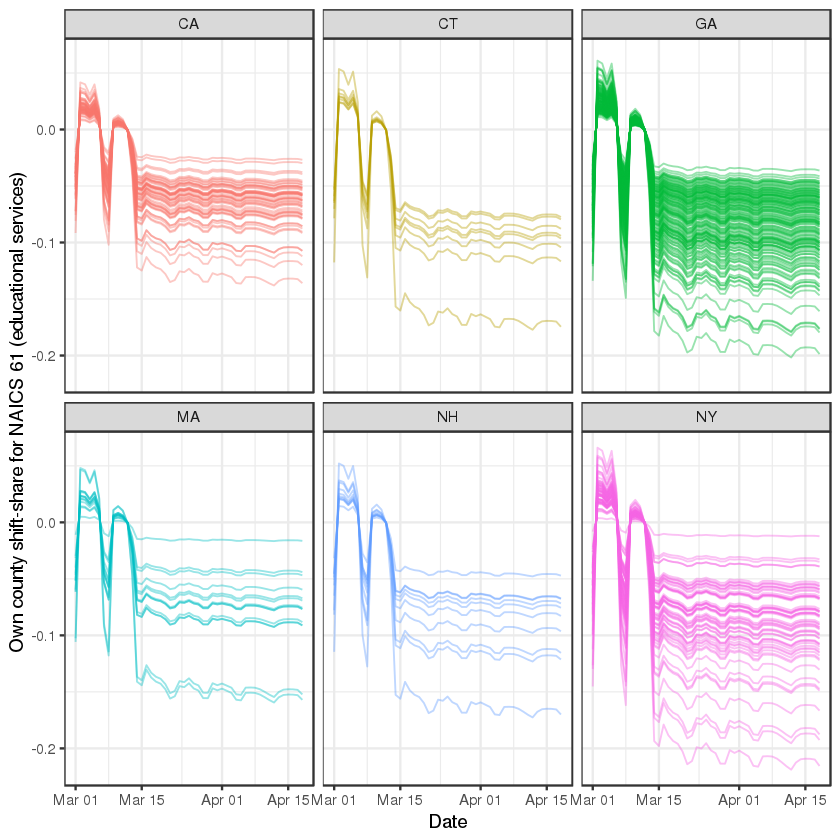

In [428]:
shift_share_time_series_plot <- ggplot(
    aes(x = as.Date(ds), y = shiftshare_61,
        group = county_fips, color = state_abbv),
    data = panel %>% filter(state_abbv %in% c("NY", "GA", "CA", "NH", "CT", "MA"))
    ) +
    facet_wrap( ~ state_abbv) +
    geom_line(alpha = .4, lwd = .4) +
    guides(color = FALSE) +
    xlab("Date") +
    ylab("Own county shift-share for NAICS 61 (educational services)")
shift_share_time_series_plot

In [429]:
ggsave(
    "../output/figures/shift_share_61_time_series_plot.pdf",
    shift_share_time_series_plot,
    width = 10,
    height = 9
)

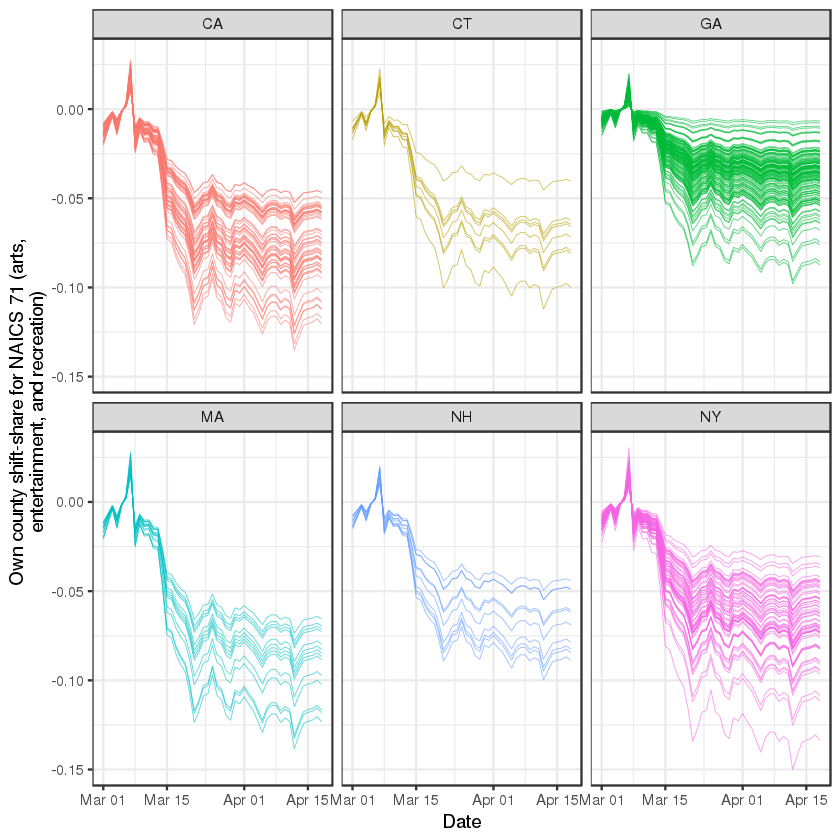

In [431]:
shift_share_time_series_plot <- ggplot(
    aes(x = as.Date(ds), y = shiftshare_71,
        group = county_fips, color = state_abbv),
    data = panel %>% filter(state_abbv %in% c("NY", "GA", "CA", "NH", "CT", "MA"))
    ) +
    facet_wrap( ~ state_abbv) +
    geom_line(alpha = .6, lwd = .2) +
    guides(color = FALSE) +
    xlab("Date") +
    ylab(str_wrap("Own county shift-share for NAICS 71 (arts, entertainment, and recreation)", 50))
shift_share_time_series_plot

In [432]:
ggsave(
    "../output/figures/shift_share_71_time_series_plot.pdf",
    shift_share_time_series_plot,
    width = 10,
    height = 9
)

In [438]:
shift_share_time_series_plot_multi <- panel %>%
    filter(state_abbv %in% c("NY", "GA", "CA", "NH", "CT", "MA")) %>%
    select(ds, state_abbv, county_fips, shiftshare_71:shiftshare_72) %>%
    pivot_longer(-c(ds, state_abbv), names_to = "shiftshare", values_to = "value") %>% head()

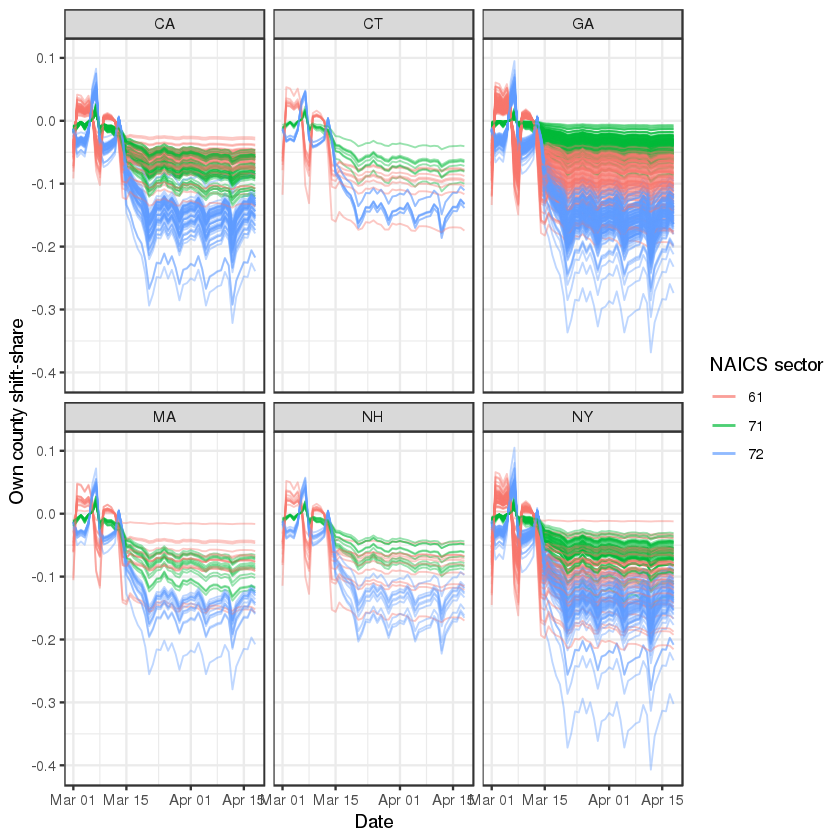

In [474]:
shift_share_time_series_plot_multi <- panel %>%
    filter(state_abbv %in% c("NY", "GA", "CA", "NH", "CT", "MA")) %>%
    select(ds, state_abbv, county_fips, shiftshare_61, shiftshare_71:shiftshare_72) %>%
    pivot_longer(c(shiftshare_61, shiftshare_71:shiftshare_72), names_to = "NAICS sector", values_to = "value") %>%
    mutate(
        `NAICS sector` = gsub("shiftshare_", "", `NAICS sector`)
    ) %>%
    ggplot(
    aes(x = as.Date(ds), y = value,
        group = paste(county_fips, `NAICS sector`), color = `NAICS sector`)
    ) +
    facet_wrap( ~ state_abbv) +
    geom_line(alpha = .4, size = .4) +
    guides(color = guide_legend(override.aes = list(size = .6, alpha = .7))) +
    xlab("Date") +
    ylab(str_wrap("Own county shift-share", 100))
shift_share_time_series_plot_multi

In [475]:
ggsave(
    "../output/figures/shift_share_multi_time_series_plot.pdf",
    shift_share_time_series_plot_multi,
    width = 9,
    height = 9
)

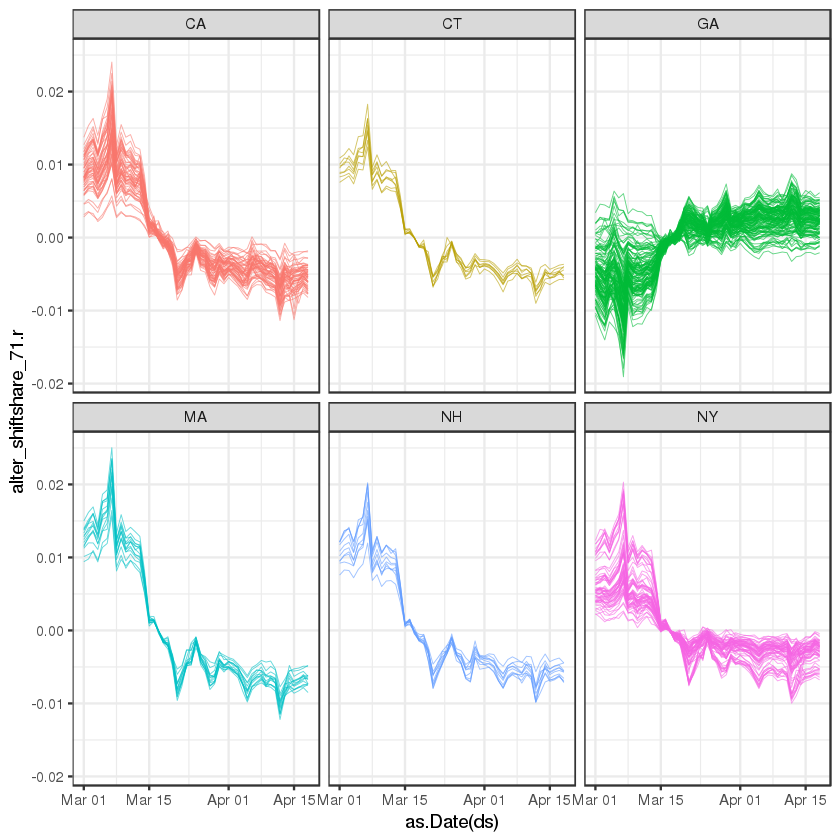

In [378]:
alter_shift_share_time_series_plot <- ggplot(
    aes(x = as.Date(ds), y = alter_shiftshare_71.r,
        group = county_fips, color = state_abbv),
    data = panel %>% filter(state_abbv %in% c("NY", "GA", "CA", "NH", "CT", "MA"))
    ) +
    facet_wrap( ~ state_abbv) +
    geom_line(alpha = .6, lwd = .2) +
    guides(color = FALSE)
alter_shift_share_time_series_plot

In [379]:
ggsave(
    "../output/figures/alter_shift_share_time_series_plot.pdf",
    alter_shift_share_time_series_plot,
    width = 10,
    height = 9
)

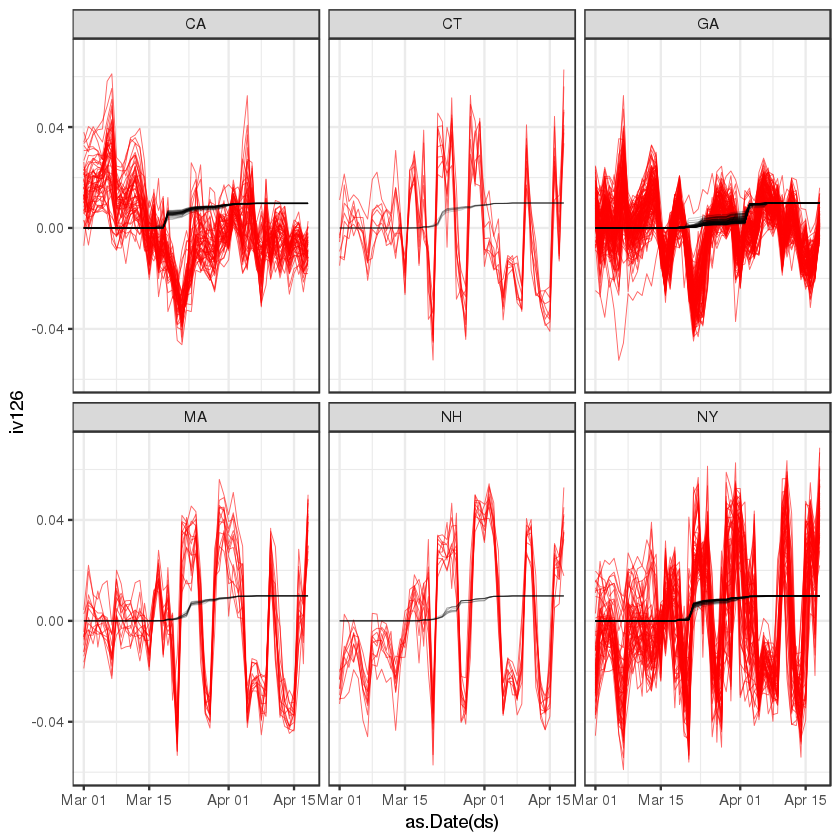

In [476]:
alter_shift_share_sh_time_series_plot <- ggplot(
    aes(x = as.Date(ds), y = iv126,
        group = county_fips),
    data = panel %>% filter(state_abbv %in% c("NY", "GA", "CA", "NH", "CT", "MA"))
    ) +
    facet_wrap( ~ state_abbv) +
    geom_line(alpha = .6, lwd = .2, color = "red") +
    geom_line(aes(y = alter_sh*.01), color = "black", alpha = .2, lwd = .2) +
    guides(color = FALSE)
alter_shift_share_sh_time_series_plot

In [381]:
ggsave(
    "../output/figures/alter_shift_share_sh_time_series_plot.pdf",
    alter_shift_share_sh_time_series_plot,
    width = 10,
    height = 9
)

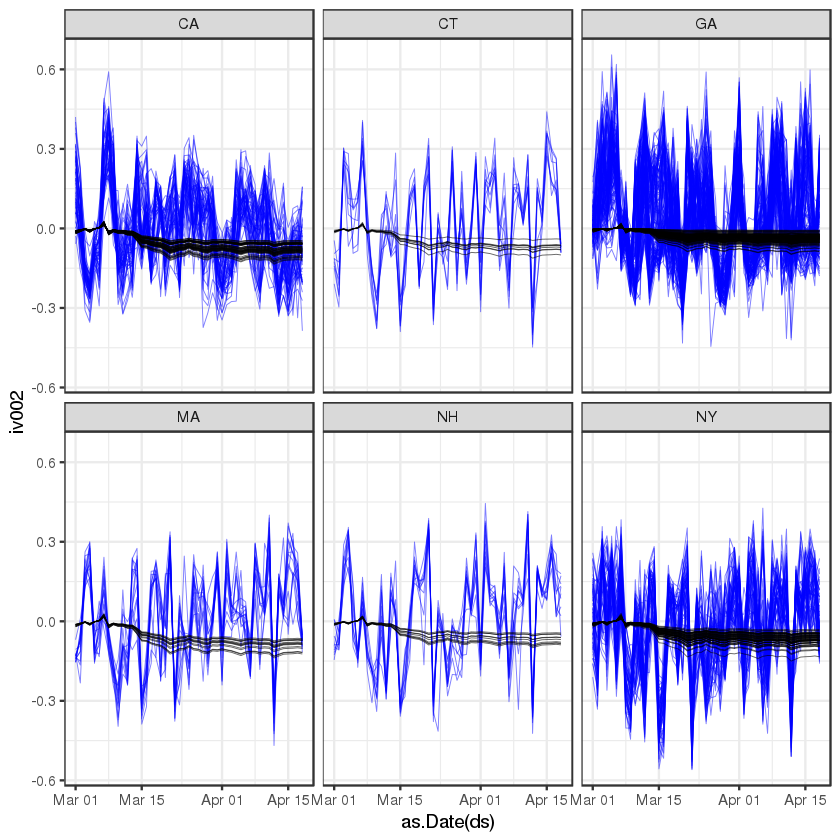

In [344]:
prcp_time_series_plot <- ggplot(
    aes(x = as.Date(ds), y = iv002,
        group = county_fips),
    data = panel %>% filter(state_abbv %in% c("NY", "GA", "CA", "NH", "CT", "MA"))
    ) +
    facet_wrap( ~ state_abbv) +
    geom_line(alpha = .5, lwd = .2, color = "blue") +
    geom_line(alpha = .6, lwd = .2, aes(y = shiftshare_71), color = "black") +
    guides(color = FALSE)
prcp_time_series_plot

## Visualize the instruments via models, binned scatter plots

In [ ]:
m1.null <- felm(ash_rnstu.r ~ shiftshare_11.r + shiftshare_21.r + shiftshare_22.r + shiftshare_23.r + shiftshare_31.r + 
                        shiftshare_32.r + shiftshare_33.r + shiftshare_42.r + shiftshare_44.r + shiftshare_45.r +
                        shiftshare_48.r + shiftshare_49.r + shiftshare_51.r + shiftshare_52.r + shiftshare_53.r +
                        shiftshare_54.r + shiftshare_55.r + shiftshare_56.r + shiftshare_61.r + shiftshare_62.r +
                        shiftshare_71.r + shiftshare_72.r + shiftshare_81.r + shiftshare_92.r + shiftshare_NA.r +
                        ban_gmr.r + alter_bgmr.r + geo_alter_bgmr.r + stay_home.r + alter_sh.r + geo_alter_sh.r |
                        county_fips + ds | 0 | 
           state_abbv, panel, weights = panel$n, keepCX = T)

In [29]:
m1.null.endog <- felm(ash_alter_rnstu.r ~ shiftshare_11.r + shiftshare_21.r + shiftshare_22.r + shiftshare_23.r + shiftshare_31.r + 
                        shiftshare_32.r + shiftshare_33.r + shiftshare_42.r + shiftshare_44.r + shiftshare_45.r +
                        shiftshare_48.r + shiftshare_49.r + shiftshare_51.r + shiftshare_52.r + shiftshare_53.r +
                        shiftshare_54.r + shiftshare_55.r + shiftshare_56.r + shiftshare_61.r + shiftshare_62.r +
                        shiftshare_71.r + shiftshare_72.r + shiftshare_81.r + shiftshare_92.r + shiftshare_NA.r +
                        ban_gmr.r + alter_bgmr.r + geo_alter_bgmr.r + stay_home.r + alter_sh.r + geo_alter_sh.r |
                        county_fips + ds | 0 | 
           state_abbv, panel, weights = panel$n, keepCX = T)

In [23]:
m1 <- felm(ash_rnstu.r ~ shiftshare_11.r + shiftshare_21.r + shiftshare_22.r + shiftshare_23.r + shiftshare_31.r + 
                        shiftshare_32.r + shiftshare_33.r + shiftshare_42.r + shiftshare_44.r + shiftshare_45.r +
                        shiftshare_48.r + shiftshare_49.r + shiftshare_51.r + shiftshare_52.r + shiftshare_53.r +
                        shiftshare_54.r + shiftshare_55.r + shiftshare_56.r + shiftshare_61.r + shiftshare_62.r +
                        shiftshare_71.r + shiftshare_72.r + shiftshare_81.r + shiftshare_92.r + shiftshare_NA.r +
                        ban_gmr.r + alter_bgmr.r + geo_alter_bgmr.r + stay_home.r + alter_sh.r + geo_alter_sh.r |
                        county_fips + ds |  
                        (ash_alter_rnstu.r ~ iv001 + iv002 + iv003 + iv004 + iv005 + iv006 + iv007 + iv008 + iv009 + iv010 +
                            iv011 + iv012 + iv013 + iv014 + iv015 + iv016 + iv017 + iv018 + iv019 + iv020 +
                            iv021 + iv022 + iv023 + iv024 + iv025 + iv026 + iv027 + iv028 + iv029 + iv030 +
                            iv031 + iv032 + iv033 + iv034 + iv035 + iv036 + iv037 + iv038 + iv039 + iv040 +
                            iv041 + iv042 + iv043 + iv044 + iv045 + iv046 + iv047 + iv048 + iv049 + iv050 +
                            iv051 + iv052 + iv053 + iv054 + iv055 + iv056 + iv057 + iv058 + iv059 + iv060 +
                            iv061 + iv062 + iv063 + iv064 + iv065 + iv066 + iv067 + iv068 + iv069 + iv070 +
                            iv071 + iv072 + iv073 + iv074 + iv075 + iv076 + iv077 + iv078 + iv079 + iv080 +
                            iv081 + iv082 + iv083 + iv084 + iv085 + iv086 + iv087 + iv088 + iv089 + iv090 +
                            iv091 + iv092 + iv093 + iv094 + iv095 + iv096 + iv097 + iv098 + iv099 + iv100 +
                            iv101 + iv102 + iv103 + iv104 + iv105 + iv106 + iv107 + iv108 + iv109 + iv110 +
                            iv111 + iv112 + iv113 + iv114 + iv115 + iv116 + iv117 + iv118 + iv119 + iv120 +
                            iv121 + iv122 + iv123 + iv124 + iv125 + iv126 + iv127 + iv128 + iv129 + iv130 +
                            iv131 + iv132 + iv133 + iv134 + iv135 + iv136 + iv137 + iv138 + iv139 + iv140) | 
           state_abbv, panel, weights = panel$n, keepCX = T)

summary(m1)
print(condfstat(m1))

Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”



Call:
   felm(formula = ash_rnstu.r ~ shiftshare_11.r + shiftshare_21.r +      shiftshare_22.r + shiftshare_23.r + shiftshare_31.r + shiftshare_32.r +      shiftshare_33.r + shiftshare_42.r + shiftshare_44.r + shiftshare_45.r +      shiftshare_48.r + shiftshare_49.r + shiftshare_51.r + shiftshare_52.r +      shiftshare_53.r + shiftshare_54.r + shiftshare_55.r + shiftshare_56.r +      shiftshare_61.r + shiftshare_62.r + shiftshare_71.r + shiftshare_72.r +      shiftshare_81.r + shiftshare_92.r + shiftshare_NA.r + ban_gmr.r +      alter_bgmr.r + geo_alter_bgmr.r + stay_home.r + alter_sh.r +      geo_alter_sh.r | county_fips + ds | (ash_alter_rnstu.r ~      iv001 + iv002 + iv003 + iv004 + iv005 + iv006 + iv007 + iv008 +          iv009 + iv010 + iv011 + iv012 + iv013 + iv014 + iv015 +          iv016 + iv017 + iv018 + iv019 + iv020 + iv021 + iv022 +          iv023 + iv024 + iv025 + iv026 + iv027 + iv028 + iv029 +          iv030 + iv031 + iv032 + iv033 + iv034 + iv035 + iv036 +          iv0

Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”


          ash_alter_rnstu.r
cluster F          296.5253
attr(,"df1")
[1] 171


In [101]:
panel$ash_rnstu.r.r <- m1.null$residuals
panel$ash_alter_rnstu.r.r.null <- m1.null.endog$residuals
panel$ash_alter_rnstu.r.fitted.null <- m1.null.endog$fitted
panel$ash_alter_rnstu.r.fitted.iv <- m1$fitted

## Binned scatter plots

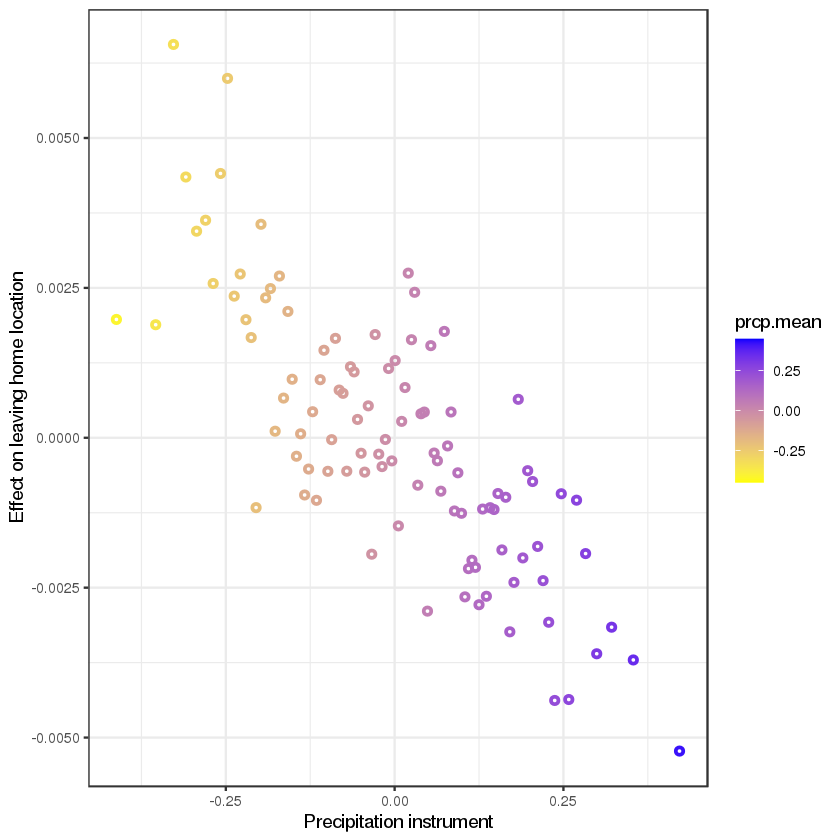

In [347]:
viv_precip_plot <- panel %>% #sample_n(1e3) %>%
    mutate(
        prcp.bin = ntile(iv001, 100)
    ) %>%
    group_by(prcp.bin) %>%
    summarise(
        x.mean = weighted.mean(ash_alter_rnstu.r.r.null, n),
        prcp.mean = mean(iv001),
        y.mean = weighted.mean(ash_rnstu.r.r, n)
    ) %>%
ggplot(aes(
    x = prcp.mean, y = y.mean,
    color = prcp.mean
    )
) +
geom_point(shape = 21, size = 1, stroke = 1.2) +
scale_color_gradient(low = "yellow", high = "blue", limits = c(-.45, .45)) + 
xlab("Precipitation instrument") +
ylab("Effect on leaving home location")
viv_precip_plot

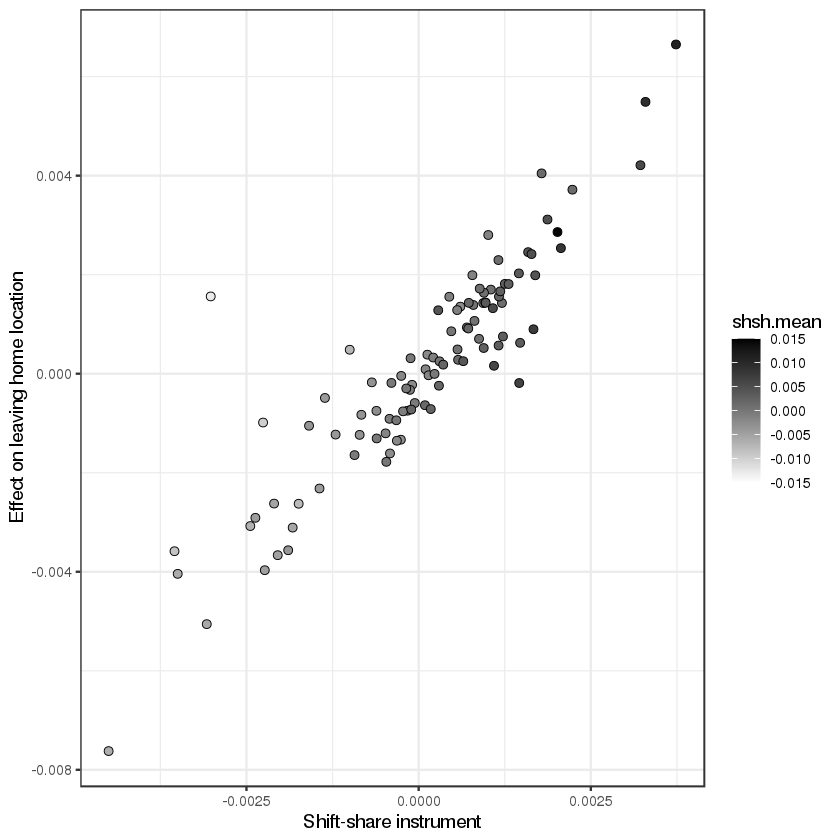

In [348]:
viv_shiftshare_plot <- panel %>% #sample_n(1e5) %>%
    select(iv001:iv010, iv042, ash_rnstu.r.r, ash_alter_rnstu.r.r.null, n) %>%
    mutate(
        shsh.bin = as.integer(ntile(iv042, 100))
    ) %>%
    group_by(shsh.bin) %>%
    summarise(
        shsh.mean = mean(iv042),
        x.mean = weighted.mean(ash_alter_rnstu.r.r.null, n),
        y.mean = weighted.mean(ash_rnstu.r.r, n)
    ) %>%
ggplot(aes(
    x = x.mean, y = y.mean,
    fill = shsh.mean
       )
) +
geom_point(shape = 21, size = 2, stroke = .3) +
scale_fill_gradient(low = "white", high = "black", limits = c(-.015, .015)) +
xlab("Shift-share instrument") +
ylab("Effect on leaving home location")
viv_shiftshare_plot

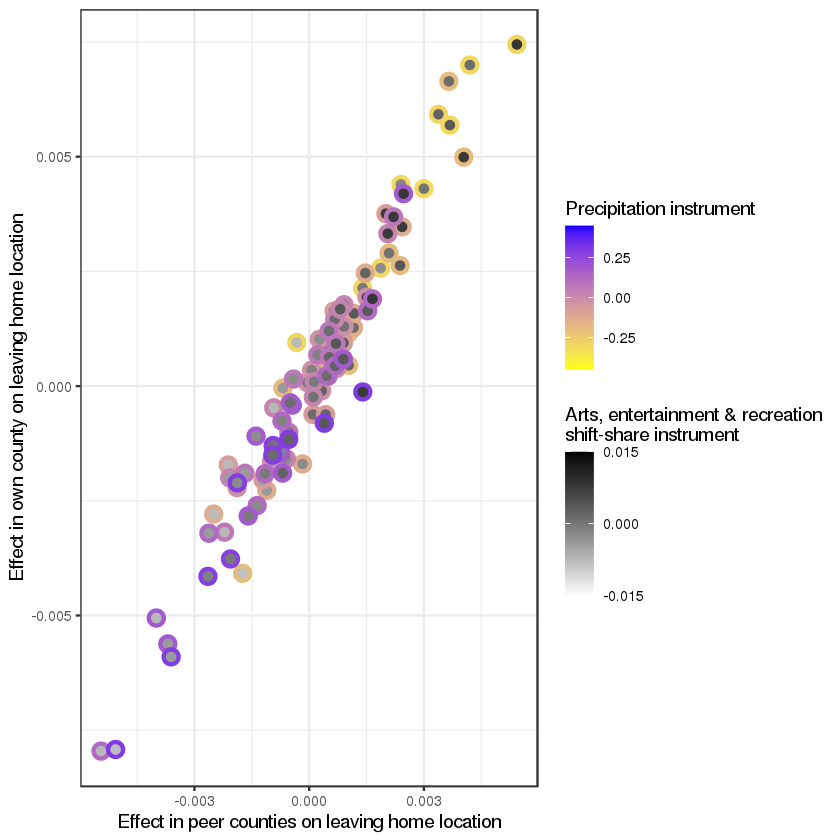

In [388]:
viv_both_plot <- panel %>% #sample_n(1e5) %>%
    select(iv001:iv010, iv042, stay_home, ash_rnstu.r.r, ash_alter_rnstu.r.r.null, n) %>%
    mutate(
        prcp.bin = ntile(iv001, 10),
        shsh.bin = as.integer(ntile(iv042, 10))
    ) %>%
    group_by(prcp.bin, shsh.bin) %>%
    summarise(
        prcp.mean = mean(iv001),
        shsh.mean = mean(iv042),
        x.mean = weighted.mean(ash_alter_rnstu.r.r.null, n),
        y.mean = weighted.mean(ash_rnstu.r.r, n)
    ) %>%
ggplot(aes(
    x = x.mean, y = y.mean,
    color = prcp.mean,
    fill = shsh.mean,
    #shape = factor(stay_home),
    #alpha = stay_home
       )
) +
geom_point(shape = 21, size = 3, stroke = 1.4) +
scale_color_gradient(
    name = "Precipitation instrument", low = "yellow", high = "blue",
    limits = c(-.45, .45)
) +
scale_fill_gradient(
    name = str_wrap("Arts, entertainment & recreation shift-share instrument", 35), low = "white", high = "black",
    limits = c(-.015, .015),
    breaks = c(-.015, 0, .015)
) +
guides(
    fill = guide_colorbar(title.position = "top"),
    color = guide_colorbar(title.position = "top")
) +
xlab("Effect in peer counties on leaving home location") +
ylab("Effect in own county on leaving home location")
#ylab("Effect on leaving home location")
viv_both_plot

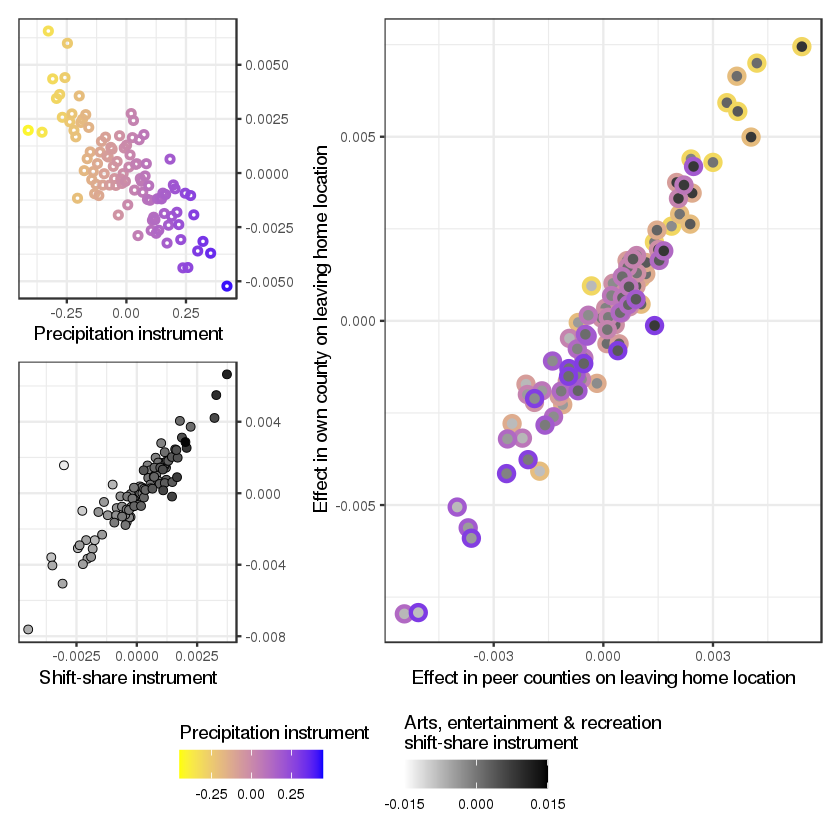

In [389]:
layout.1 <- "
AACCCC
BBCCCC
"

viv_plot_combined <-
    (viv_precip_plot + guides(color = FALSE) + scale_y_continuous(position = "right") + ylab(NULL)) +
    (viv_shiftshare_plot + guides(fill = FALSE) + scale_y_continuous(position = "right") + ylab(NULL)) +
    (viv_both_plot) +
    plot_layout(design = layout.1, guides = "collect") &
    theme(legend.position = "bottom", legend.direction="horizontal", legend.box="horizontal")
viv_plot_combined

In [393]:
ggsave(
    "../output/figures/viv_plot_combined.pdf",
    viv_plot_combined,
    width = 7,
    height = 5.5
)

In [391]:
#sum.m1 <- summarize.felm.fit.with.adj(m1, conley.selector.matrix, panel$state_abbv)
#sum.m1$ct

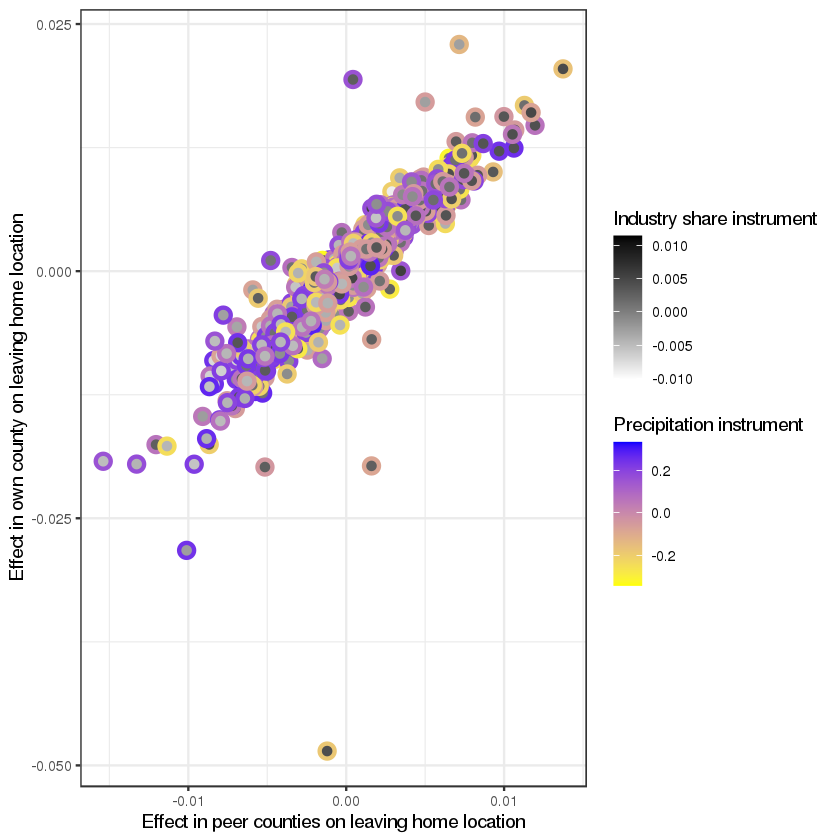

In [392]:
viv_both_plot_counties <- panel %>% #sample_n(1e5) %>%
    mutate(
        prcp.bin = ntile(iv001, 4),
        shsh.bin = as.integer(ntile(iv042, 4))
    ) %>%
    group_by(county_fips, ds, shsh.bin) %>%
    summarise(
        prcp.mean = mean(iv001),
        shsh.mean = mean(iv042),
        x.mean = weighted.mean(ash_alter_rnstu.r.r.null, n),
        y.mean = weighted.mean(ash_rnstu.r.r, n)
    ) %>%
ggplot(aes(
    x = x.mean, y = y.mean,
    color = prcp.mean
       )
) +
geom_point(shape = 21, size = 3, stroke = 1, fill = NA) +
scale_color_gradient(name = "Precipitation instrument", low = "yellow", high = "blue") +
#scale_fill_gradient(name = "Industry share instrument", low = "white", high = "black") +
#scale_shape_manual(values = c(21, 22)) +
xlab("Effect in peer counties on leaving home location") +
ylab("Effect in own county on leaving home location")
viv_both_plot_ds

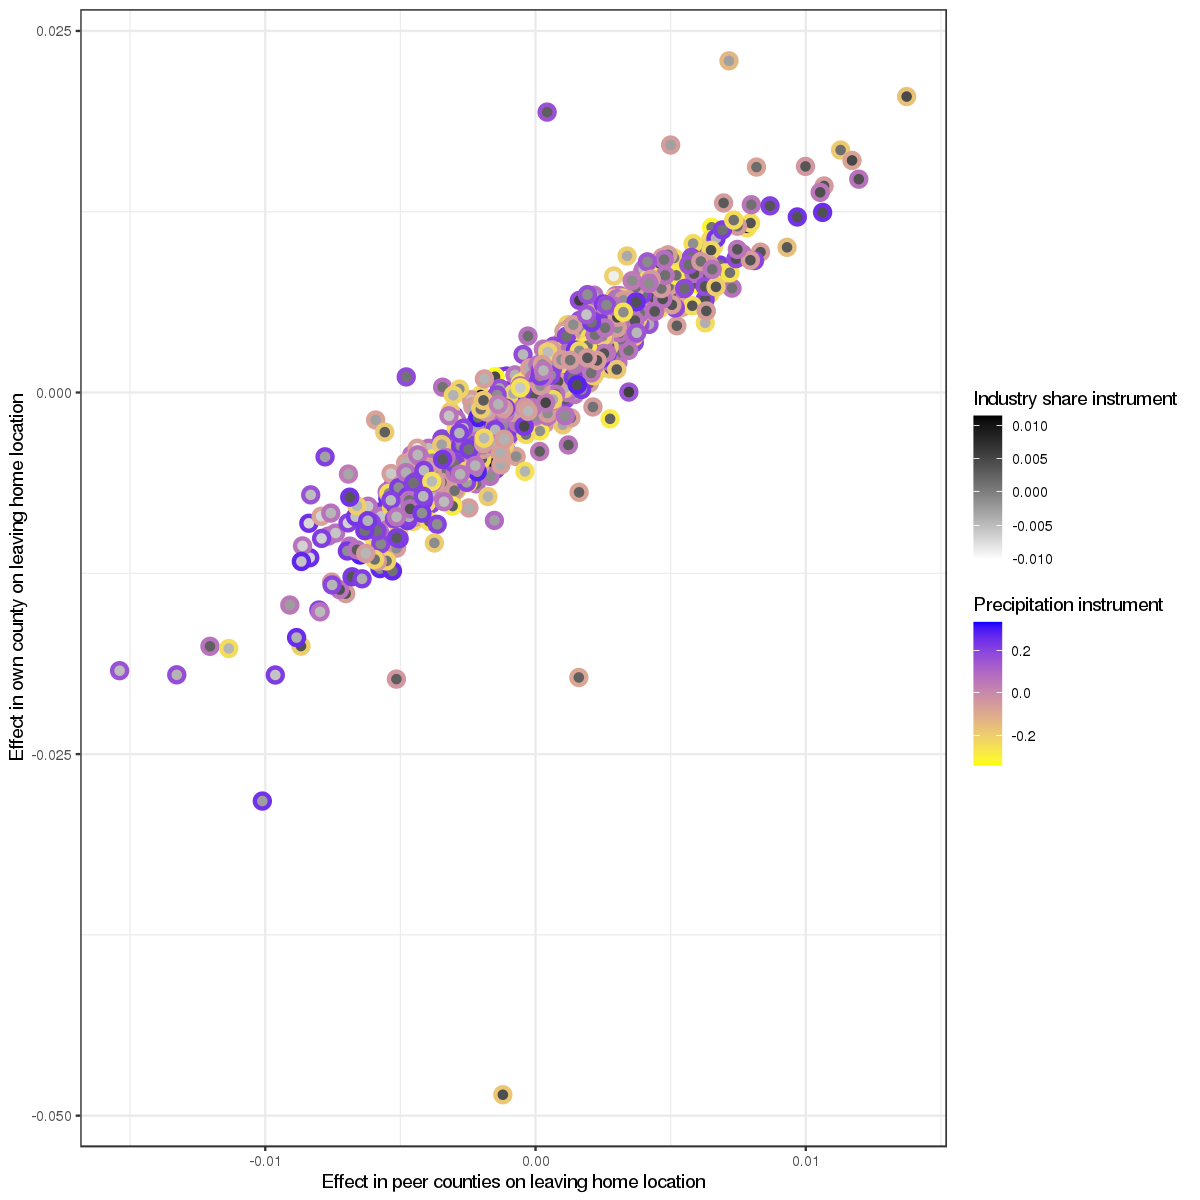

In [216]:
viv_both_plot_ds <- panel %>% #sample_n(1e5) %>%
    mutate(
        prcp.bin = ntile(iv001, 4),
        shsh.bin = as.integer(ntile(iv042, 4))
    ) %>%
    group_by(ds, prcp.bin, shsh.bin) %>%
    summarise(
        prcp.mean = mean(iv001),
        shsh.mean = mean(iv042),
        x.mean = weighted.mean(ash_alter_rnstu.r.r.null, n),
        y.mean = weighted.mean(ash_rnstu.r.r, n)
    ) %>%
ggplot(aes(
    x = x.mean, y = y.mean,
    color = prcp.mean,
    fill = shsh.mean,
    #shape = factor(stay_home),
    #alpha = stay_home
       )
) +
geom_point(shape = 21, size = 3, stroke = 1.4) +
scale_color_gradient(name = "Precipitation instrument", low = "yellow", high = "blue") +
scale_fill_gradient(name = "Industry share instrument", low = "white", high = "black") +
#scale_shape_manual(values = c(21, 22)) +
xlab("Effect in peer counties on leaving home location") +
ylab("Effect in own county on leaving home location")
viv_both_plot_ds

In [1]:
load('/nfs/sloanlab004/projects/covid_mobility_proj/data/PROCESSED_DATA/iv_results_multiplier100.RData')


In [10]:
fm1 <- readRDS("/nfs/sloanlab004/projects/covid_mobility_proj/models/iv_fb_btvrc_mod.rds")
ct1 <- readRDS("/nfs/sloanlab004/projects/covid_mobility_proj/models/iv_fb_btvrc.rds")

In [12]:
summary(fm1)


Call:
   felm(formula = fb_btvrc.r ~ shiftshare_11.r + shiftshare_21.r +      shiftshare_22.r + shiftshare_23.r + shiftshare_31.r + shiftshare_32.r +      shiftshare_33.r + shiftshare_42.r + shiftshare_44.r + shiftshare_45.r +      shiftshare_48.r + shiftshare_49.r + shiftshare_51.r + shiftshare_52.r +      shiftshare_53.r + shiftshare_54.r + shiftshare_55.r + shiftshare_56.r +      shiftshare_61.r + shiftshare_62.r + shiftshare_71.r + shiftshare_72.r +      shiftshare_81.r + shiftshare_92.r + shiftshare_NA.r + ban_gmr.r +      alter_bgmr.r + geo_alter_bgmr.r + stay_home.r + alter_sh.r +      geo_alter_sh.r | county_fips + ds | (fb_alter_btvrc.r ~ iv001 +      iv002 + iv003 + iv004 + iv005 + iv006 + iv007 + iv008 + iv009 +      iv010 + iv011 + iv012 + iv013 + iv014 + iv015 + iv016 + iv017 +      iv018 + iv019 + iv020 + iv021 + iv022 + iv023 + iv024 + iv025 +      iv026 + iv027 + iv028 + iv029 + iv030 + iv031 + iv032 + iv033 +      iv034 + iv035 + iv036 + iv037 + iv038 + iv039 + iv040 

In [18]:
summary(fm1$stage1)

Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”



Call:
   NULL 

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-55.138  -2.365  -0.004   2.378  44.270 

Coefficients:
                   Estimate Cluster s.e. t value Pr(>|t|)    
shiftshare_11.r  -4.333e+00    2.288e+00  -1.893 0.064110 .  
shiftshare_21.r   4.449e+00    2.247e+00   1.980 0.053205 .  
shiftshare_22.r   4.723e-01    2.921e-01   1.617 0.112216    
shiftshare_23.r  -1.536e-01    6.829e-01  -0.225 0.823006    
shiftshare_31.r   5.363e-02    2.090e-01   0.257 0.798583    
shiftshare_32.r  -3.585e+00    2.455e+00  -1.460 0.150535    
shiftshare_33.r   8.059e-01    5.964e-01   1.351 0.182651    
shiftshare_42.r   4.149e-01    2.365e-01   1.754 0.085533 .  
shiftshare_44.r   3.892e-02    2.719e-02   1.431 0.158513    
shiftshare_45.r   1.779e-02    3.021e-02   0.589 0.558632    
shiftshare_48.r  -5.946e-02    1.048e-01  -0.567 0.572934    
shiftshare_49.r  -2.516e-02    2.112e-01  -0.119 0.905652    
shiftshare_51.r   2.516e-01    1.566e-01   1.607 0.114452   

In [4]:
outcome_list[1]

coef_name,coef_val,error,lb,ub
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
ban_gmr.r,-0.001995034,0.0027959234,-0.007475044,0.003484976
alter_bgmr.r,-0.001681408,0.0071318182,-0.015659772,0.012296955
geo_alter_bgmr.r,0.002795631,0.0044805496,-0.005986246,0.011577508
stay_home.r,-0.009588585,0.0040691998,-0.017564217,-0.001612954
alter_sh.r,0.016509571,0.0115000540,-0.006030535,0.039049677
geo_alter_sh.r,-0.003401756,0.0057233133,-0.014619450,0.007815939
`ash_alter_rnstu.r(fit)`,0.016390909,0.0009831545,0.014463926,0.018317892
